<br><p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Final Project <br> <br> <br>Google Play Store Apps</p><br><br>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/y/Desktop/Python for Data Science _ UCSanDiegoX/Final Project/google-play-store-apps/googleplaystore.csv')
data.shape

(10841, 13)

In [3]:
reviews = pd.read_csv('C:/Users/y/Desktop/Python for Data Science _ UCSanDiegoX/Final Project/google-play-store-apps/googleplaystore_user_reviews.csv')
reviews.shape

(64295, 5)

In [4]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
del data['Last Updated']
del data['Current Ver']
del data['Android Ver']

In [6]:
data.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
dtype: bool

In [7]:
Apps =data.dropna()
Apps.shape

(9366, 10)

In [8]:
Apps.isnull().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
dtype: bool

In [9]:
Apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [46]:
events = data['Category'].str.contains('EVENTS')
events.head(7)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
Name: Category, dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A5C7A8400>]],
      dtype=object)

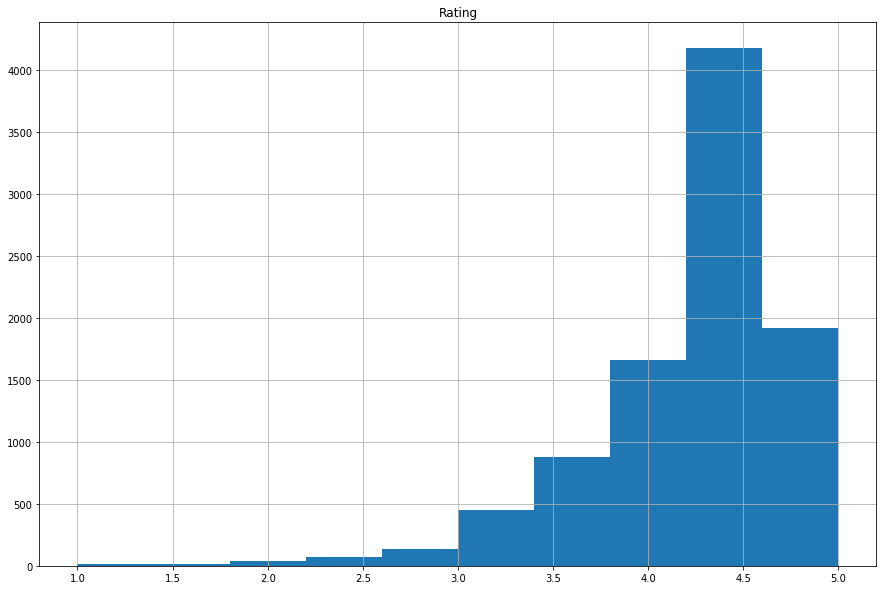

In [10]:
%matplotlib inline

Apps.hist(column='Rating', figsize=(15,10))

In [39]:
Apps['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

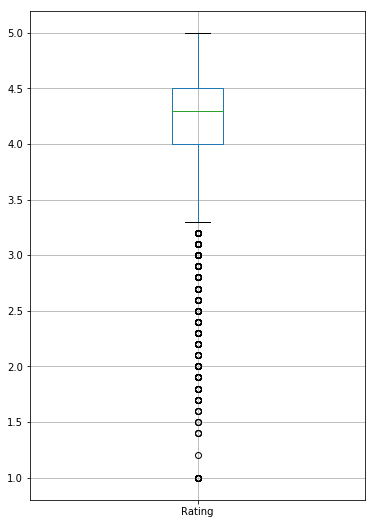

In [41]:
Apps.boxplot(column='Rating', figsize=(6,9))

In [11]:
filter1 = Apps['Rating'] >= 4 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A5C854390>]],
      dtype=object)

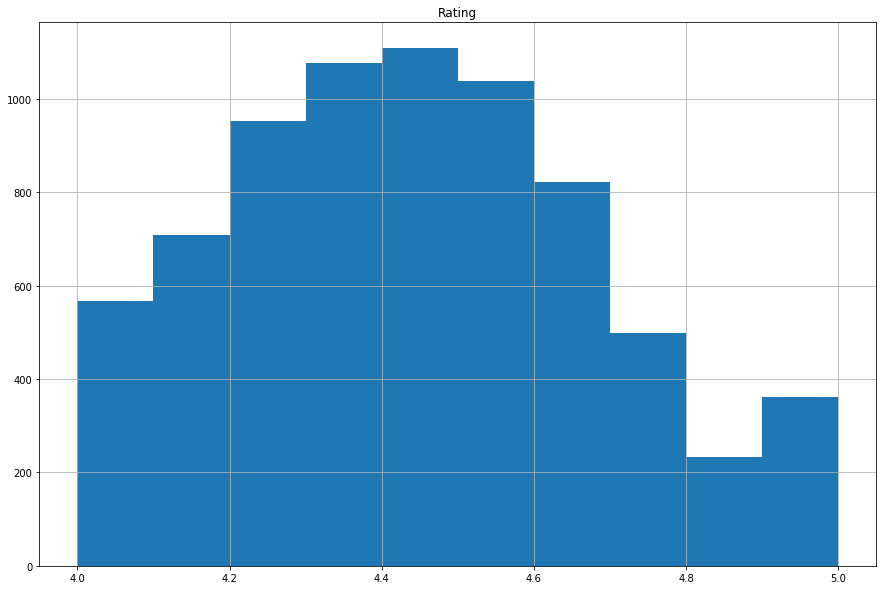

In [12]:
Apps[filter1].hist(column='Rating', figsize=(15,10))

In [13]:
Apps[filter1].shape

(7368, 10)

In [14]:
filter2 = Apps['Type'].str.contains('Free') 
Apps[filter2].shape

(8719, 10)

In [15]:
filter3 = Apps['Type'].str.contains('Paid') 
Apps[filter3].shape

(647, 10)

In [16]:
Apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres'],
      dtype='object')

In [17]:
category = Apps['Category'].unique().tolist()
len(category)

33

In [18]:
average_rating = Apps.groupby('Category',as_index=False).mean()
average_rating.head(33)

,Category,Rating
0,ART_AND_DESIGN,4.358065
1,AUTO_AND_VEHICLES,4.190411
2,BEAUTY,4.278571
3,BOOKS_AND_REFERENCE,4.346067
4,BUSINESS,4.121452
5,COMICS,4.155172
6,COMMUNICATION,4.158537
7,DATING,3.970769
8,EDUCATION,4.389032
9,ENTERTAINMENT,4.126174


In [19]:
category = average_rating['Category']
ratings = average_rating['Rating'].values

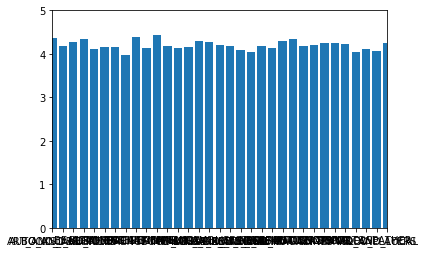

In [33]:
plt.bar(category,ratings)
plt.axis(['ART_AND_DESIGN','WEATHER',0,5])
plt.show()

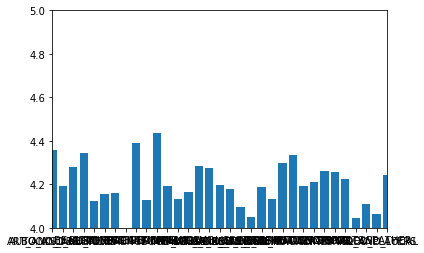

In [20]:
plt.bar(category,ratings)
plt.axis(['ART_AND_DESIGN','WEATHER',4,5])
plt.show()

In [21]:
average_rating1 = Apps.groupby('Type',as_index=False).mean()
average_rating1.head()

,Type,Rating
0,Free,4.186203
1,Paid,4.266615


In [22]:
average_rating.sort_values('Rating',ascending=False)

,Category,Rating
10,EVENTS,4.435556
8,EDUCATION,4.389032
0,ART_AND_DESIGN,4.358065
3,BOOKS_AND_REFERENCE,4.346067
23,PERSONALIZATION,4.335987
22,PARENTING,4.300000
14,GAME,4.286326
2,BEAUTY,4.278571
15,HEALTH_AND_FITNESS,4.277104
26,SHOPPING,4.259664


In [23]:
Apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [26]:
Apps['Installs'] = Apps['Installs'].str.replace('[,+]','').astype(int)

C:\Users\y\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
Apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

In [28]:
Apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity


In [29]:
installs = Apps['Installs'].unique().tolist()
len(installs)

19

In [30]:
installs

[10000,
 500000,
 5000000,
 50000000,
 100000,
 50000,
 1000000,
 10000000,
 5000,
 100000000,
 1000000000,
 1000,
 500000000,
 100,
 500,
 10,
 5,
 50,
 1]

In [31]:
average_rating1 = Apps.groupby('Installs',as_index=False).mean()
average_rating1.head(19)

,Installs,Rating
0,1,5.000000
1,5,4.611111
2,10,4.624638
3,50,4.419643
4,100,4.363430
5,500,4.176617
6,1000,4.066760
7,5000,4.024537
8,10000,4.039703
9,50000,4.051178


In [32]:
np.corrcoef(Apps['Installs'],Apps['Rating'])

array([[1.        , 0.05135457],
       [0.05135457, 1.        ]])